In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from string import ascii_letters
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/jllce/Downloads/data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Retirando o id, que é apenas o número de registro, e o Unnamed: 32, pois é uma coluna com apenas valores nulos
df = df.drop(columns=["Unnamed: 32", "id"])

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
#Criando conjuntos de observações de treino e teste. O teste terá apenas 20% das observações.
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)

In [8]:
# Criando as variáveis de treino e teste. Lembrando que as variáveis independentes, que são as X, não podem conter
# a variável target (diagnosis), pois ela é a variável dependente, ou seja, o Y.

X_test = test_set.drop(columns=["diagnosis"])
y_test = test_set["diagnosis"].copy()

X_train = train_set.drop(columns=["diagnosis"])
y_train = train_set["diagnosis"].copy()

In [9]:
#Aqui apenas será realizada a conta de quantas observações são Benignas ou Malignas no conjunto de observações de treino

y_class_count = dict(y_train.value_counts())
y_samples_sum = sum(y_class_count.values())
print("Ocorrência de Tumores Benignos: {0}".format(y_class_count["B"]/y_samples_sum))
print("Ocorrência de Tumores Malignos: {0}".format(y_class_count["M"]/y_samples_sum))

Ocorrência de Tumores Benignos: 0.6285714285714286
Ocorrência de Tumores Malignos: 0.37142857142857144


In [10]:
# Pegando a variável dependente e transformando em binário, para que eu possa trabalhar no modelo, pois ele vai ler 0 e 1,
# não textos
y_train = np.where(y_train.str.contains("M"),1,0)
y_test = np.where(y_test.str.contains("M"),1,0)

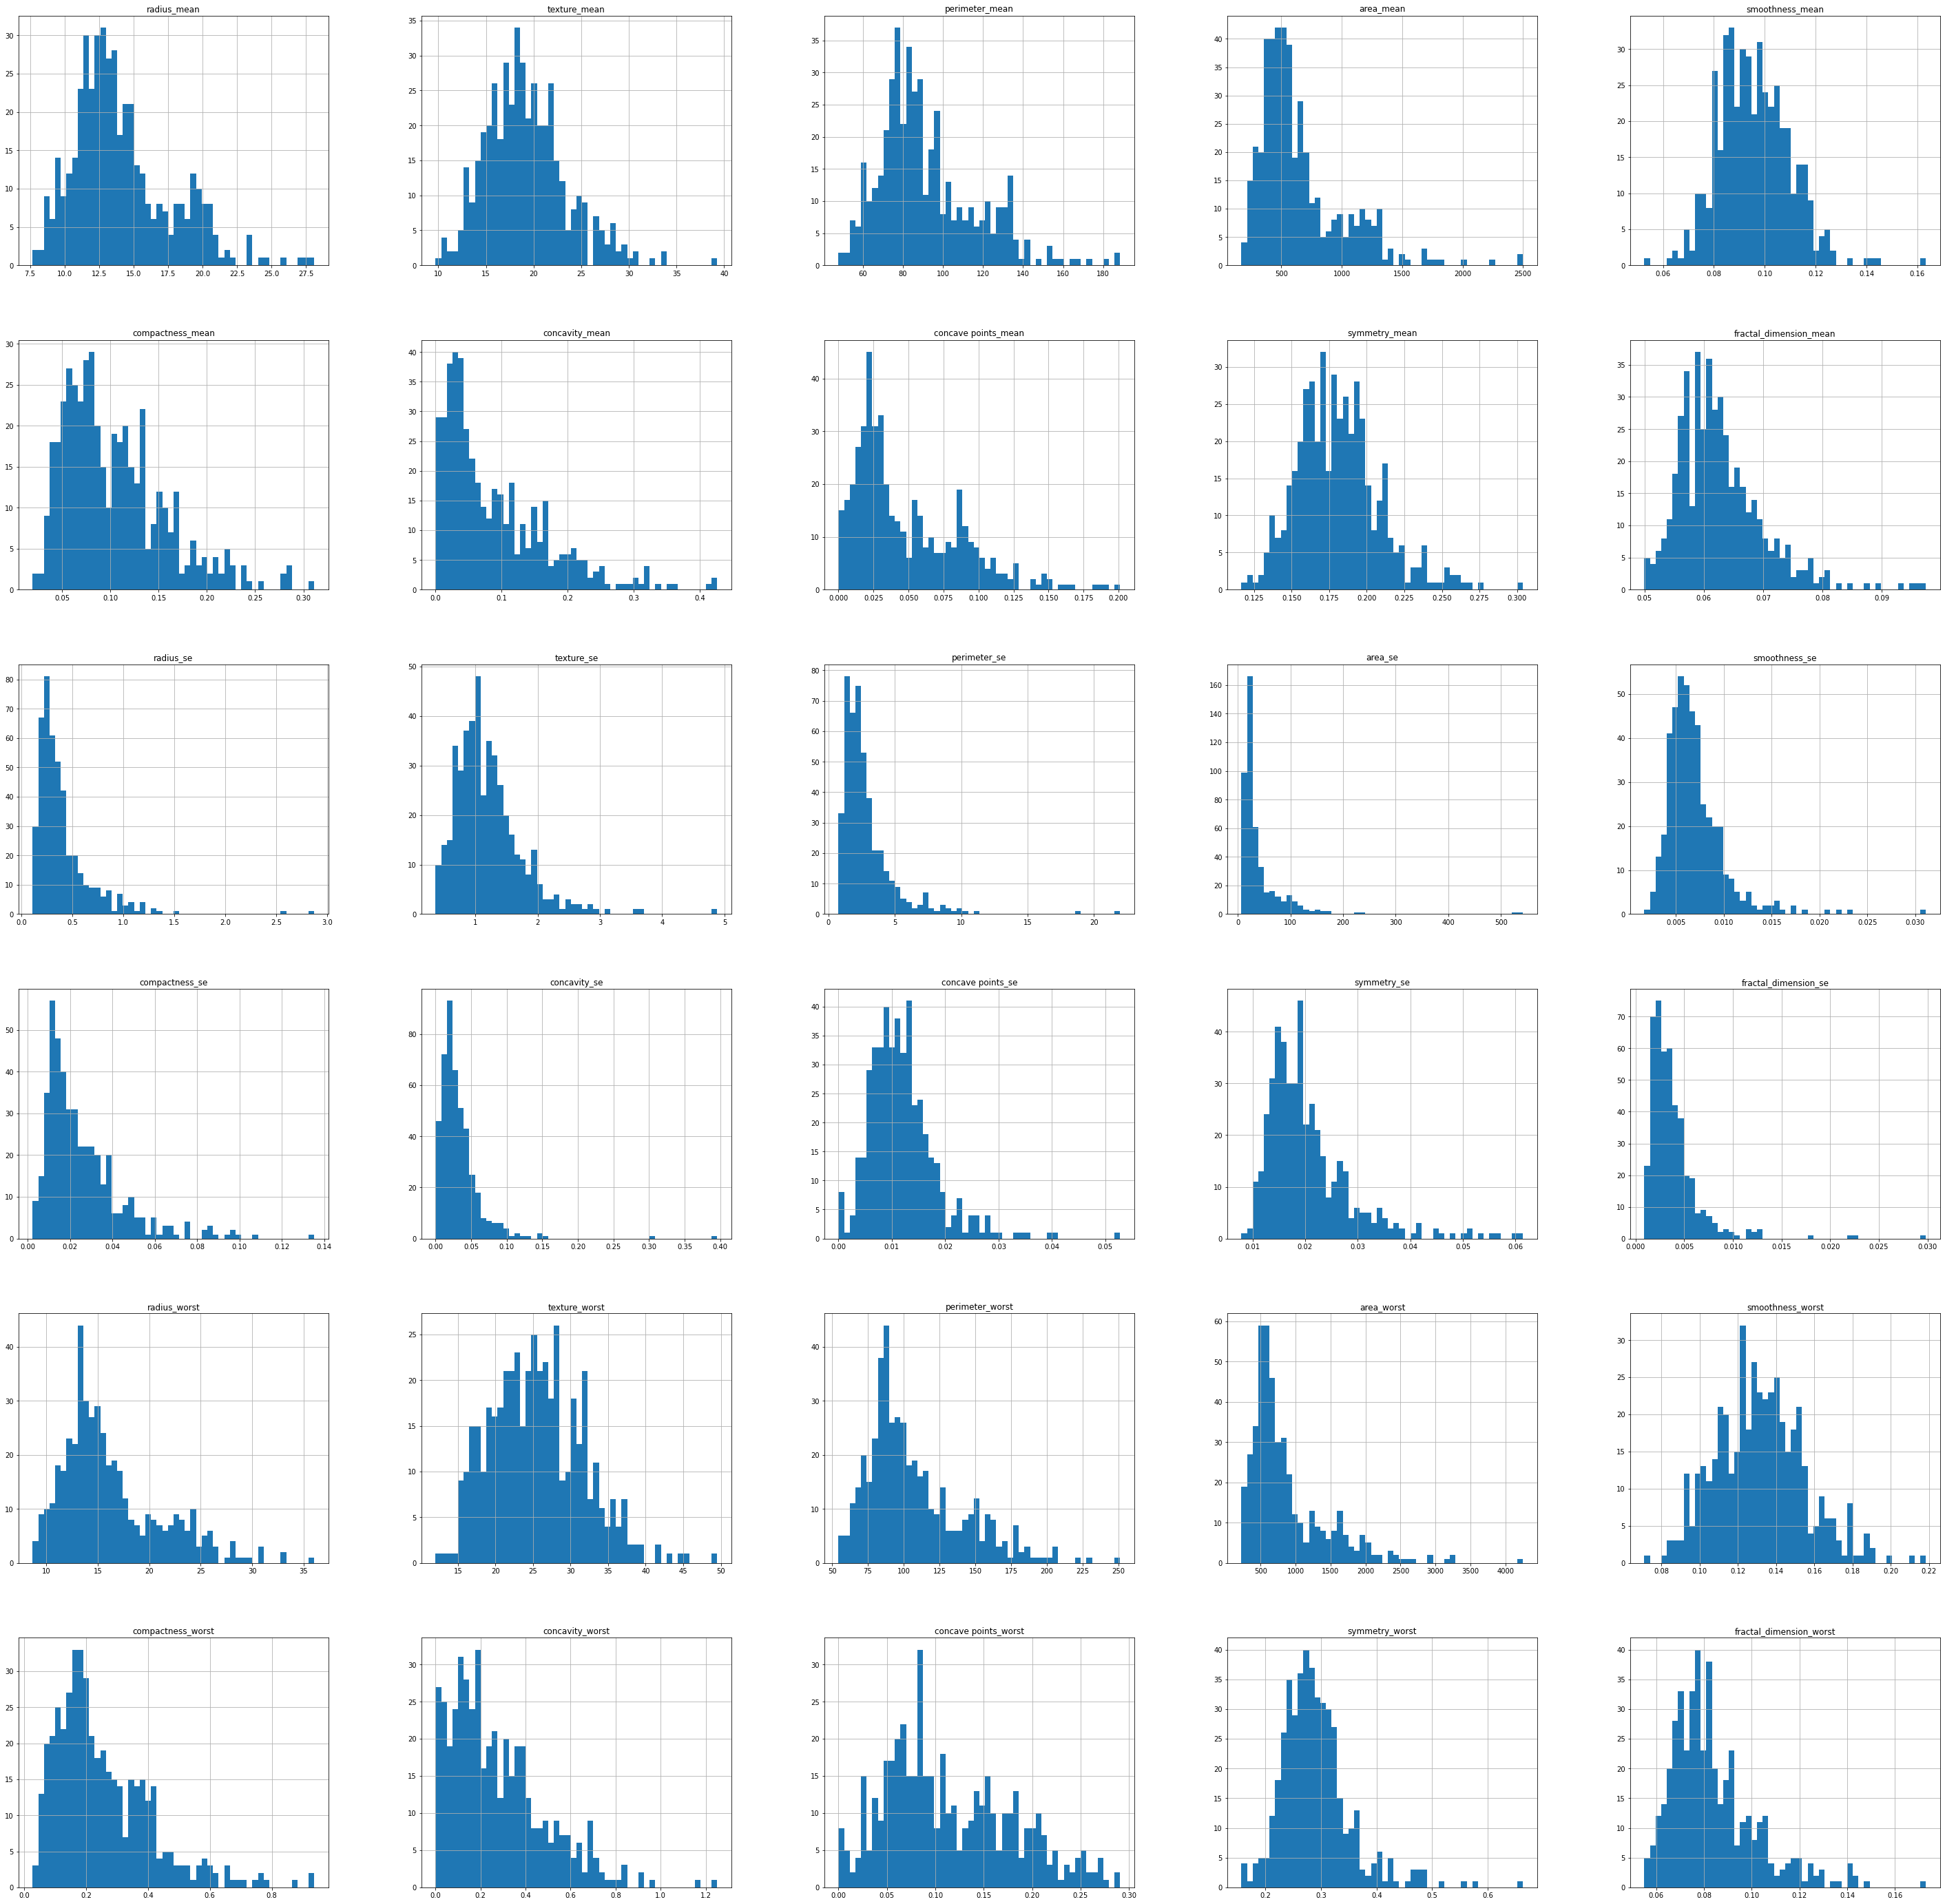

In [11]:
# histograma de cada variável independente
X_train.hist(bins=50, figsize=(50,50))
plt.show()

In [12]:
# Criando uma heatmap para que eu possa identificar a correlação entre as variáveis
cov_mat = X_train.corr()
sns.set(font_scale=5)
plt.figure(figsize=(200,200))
sns.set(font_scale=10)
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':100},
                 yticklabels = X_train.columns, xticklabels = X_train.columns)

plt.title("Correlação", fontsize=16)
plt.tight_layout()
plt.show()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.306881,0.997850,0.986609,0.173051,0.477986,0.647311,0.812377,0.150386,-0.335575,...,0.969134,0.287590,0.963536,0.941849,0.121926,0.386325,0.496800,0.722309,0.168092,-0.024337
texture_mean,0.306881,1.000000,0.313124,0.300314,0.009475,0.229954,0.282160,0.286231,0.108045,-0.079010,...,0.332908,0.909718,0.340226,0.318693,0.093301,0.274007,0.282771,0.299703,0.122984,0.102868
perimeter_mean,0.997850,0.313124,1.000000,0.985985,0.210092,0.529721,0.688251,0.842081,0.185885,-0.286307,...,0.969620,0.294406,0.969674,0.943283,0.153170,0.430426,0.535560,0.751413,0.191948,0.020731
area_mean,0.986609,0.300314,0.985985,1.000000,0.180709,0.471296,0.659793,0.814273,0.152679,-0.305321,...,0.960519,0.274861,0.955701,0.959723,0.127772,0.364068,0.484949,0.700435,0.144752,-0.026035
smoothness_mean,0.173051,0.009475,0.210092,0.180709,1.000000,0.672342,0.536920,0.564538,0.539744,0.577171,...,0.223284,0.075452,0.251658,0.219265,0.808290,0.492527,0.458749,0.526387,0.385244,0.521392
compactness_mean,0.477986,0.229954,0.529721,0.471296,0.672342,1.000000,0.877467,0.825932,0.620483,0.569638,...,0.514854,0.247127,0.573716,0.493183,0.572021,0.867774,0.813566,0.817321,0.506480,0.691960
concavity_mean,0.647311,0.282160,0.688251,0.659793,0.536920,0.877467,1.000000,0.914671,0.519030,0.349280,...,0.665091,0.289986,0.710338,0.659259,0.457626,0.751516,0.884079,0.855087,0.416326,0.519451
concave points_mean,0.812377,0.286231,0.842081,0.814273,0.564538,0.825932,0.914671,1.000000,0.476735,0.160184,...,0.827695,0.300338,0.855666,0.811102,0.467630,0.664415,0.748041,0.910680,0.391108,0.363804
symmetry_mean,0.150386,0.108045,0.185885,0.152679,0.539744,0.620483,0.519030,0.476735,1.000000,0.482673,...,0.192004,0.138865,0.229285,0.183576,0.416854,0.508593,0.461163,0.464676,0.699251,0.476875
fractal_dimension_mean,-0.335575,-0.079010,-0.286307,-0.305321,0.577171,0.569638,0.349280,0.160184,0.482673,1.000000,...,-0.271858,-0.053244,-0.221453,-0.246204,0.495491,0.467774,0.364380,0.186256,0.317793,0.784537


In [13]:
# Agora partindo para o modelo especificamente. (primeiro será feito sem uma redução de dimensionalidade (PCA). Depois, com.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc #a curva roc eh pra ver qual a estimativa de falsos positivos e negativos
from sklearn.preprocessing import StandardScaler # para padronizar/normalizar

In [14]:
#Carregando o modelo na variável forest_clf
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
#Rodando o modelo
y_probas_forest = cross_val_predict(forest_clf, StandardScaler().fit_transform(X_train), y_train,
                                    cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:,1] #score = prob. de ser da classe positiva
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

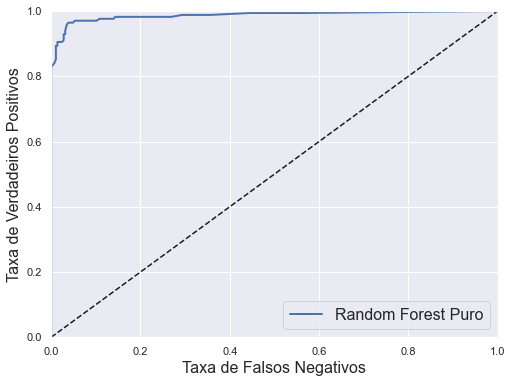

Área sob a curva: 0.9870174204493731


In [20]:
# Plotando o modelo e enxergando a curva. Essa curva, que é a linha que mostra o desempenho do modelo randomforest,
# contempla uma área que cobre 98,7%. A probabilidade de um falso negativo eh muito pequeno, e de verdadeiro positivo
#é muito alto e constante. Isso quer dizer que eh um modelo muito bem treinado e que prediz muito bem.
sns.set(font_scale = 1)
plt.figure(figsize=(8,6))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest Puro")
plt.plot([0,1], [0,1], "k--")
plt.axis([0,1,0,1])
plt.xlabel("Taxa de Falsos Negativos", fontsize=16)
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()
print("Área sob a curva: {0}".format(auc(fpr_forest, tpr_forest)))

In [21]:
# Agora partiremos para a redução de dimensionalidade, com os componentes principais (PCA)
from sklearn.decomposition import PCA

In [22]:
# Dessa forma, teremos um dataframe mostrando que o PCA, para atingir uma variância de 95% da original,
# tentando preservá-la, transformou aquelas 31 variáveis em 10 componentes.
pca = PCA(.95)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X_train))
principalDF = pd.DataFrame(data = principalComponents)
principalDF

,0,1,2,3,4,5,6,7,8,9
0,4.244903,9.131428,1.504262,-0.650982,4.321306,1.684281,-1.999392,0.328794,3.733334,-3.021001
1,9.053755,0.475310,-3.198215,0.704403,0.324461,0.648746,0.848774,-0.243660,-1.070485,1.276224
2,-2.275374,3.278471,2.816370,-0.268242,-0.582721,2.988050,0.138743,-0.489081,-0.498985,0.095752
3,-2.510453,0.743743,-0.736034,2.524633,-1.639580,0.088052,0.170851,0.258152,0.578347,0.287879
4,-2.302848,2.665155,1.192885,-1.268602,-3.516421,2.795426,0.538828,-0.752522,0.132848,1.389429
...,...,...,...,...,...,...,...,...,...,...
450,-0.368252,7.231415,3.805657,-2.364698,1.804542,-1.775246,1.730576,1.812671,-1.877876,3.069933
451,-0.686605,1.781220,-0.693044,0.586677,-1.091352,-1.557843,-0.331881,-0.607849,0.348577,-0.471461
452,-4.500654,-3.067808,-0.031045,-0.444543,1.429977,1.014813,0.070899,0.196234,-0.378339,0.315935
453,0.728285,0.426287,-2.730932,0.529393,0.005962,-1.090005,0.115138,-0.142244,-0.093700,-0.527183


In [23]:
# É possível ver que a primeira compoenente tem 43,5% da variância original. A segundo, 19,5%. E por aí vai ate bater os
# 95%
print("Variância por componente principal: {0}".format(pca.explained_variance_ratio_))

Variância por componente principal: [0.43502782 0.19500007 0.09781519 0.06486409 0.05253378 0.041128
 0.0223559  0.01647952 0.01380052 0.01205262]


In [24]:
#Aqui mostra que totalizou os 95% exigidos.
sum(pca.explained_variance_ratio_)

0.951057505932727

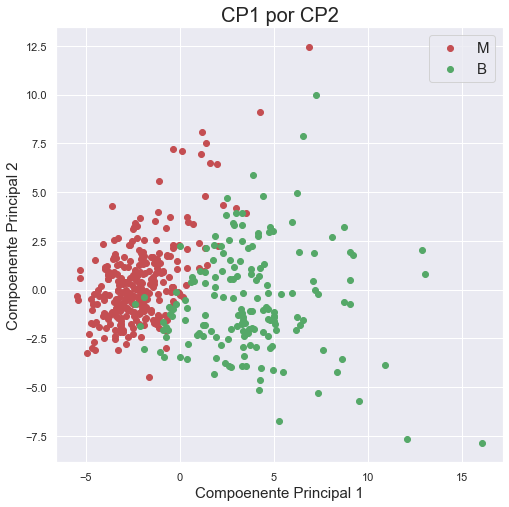

In [26]:
# Fazendo um gráfico para analisar, através das 2 componentes mais significativas, como tá a distribuição de M e B
targets = [0,1]
labels = ["M", "B"]
colors = ["r", "g"]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Compoenente Principal 1", fontsize = 15)
ax.set_ylabel("Compoenente Principal 2", fontsize = 15)
ax.set_title("CP1 por CP2", fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    ax.scatter((principalDF.loc[indicesToKeep,0]),
              (principalDF.loc[indicesToKeep,1]), c = color)
ax.legend(labels, prop={"size":15})

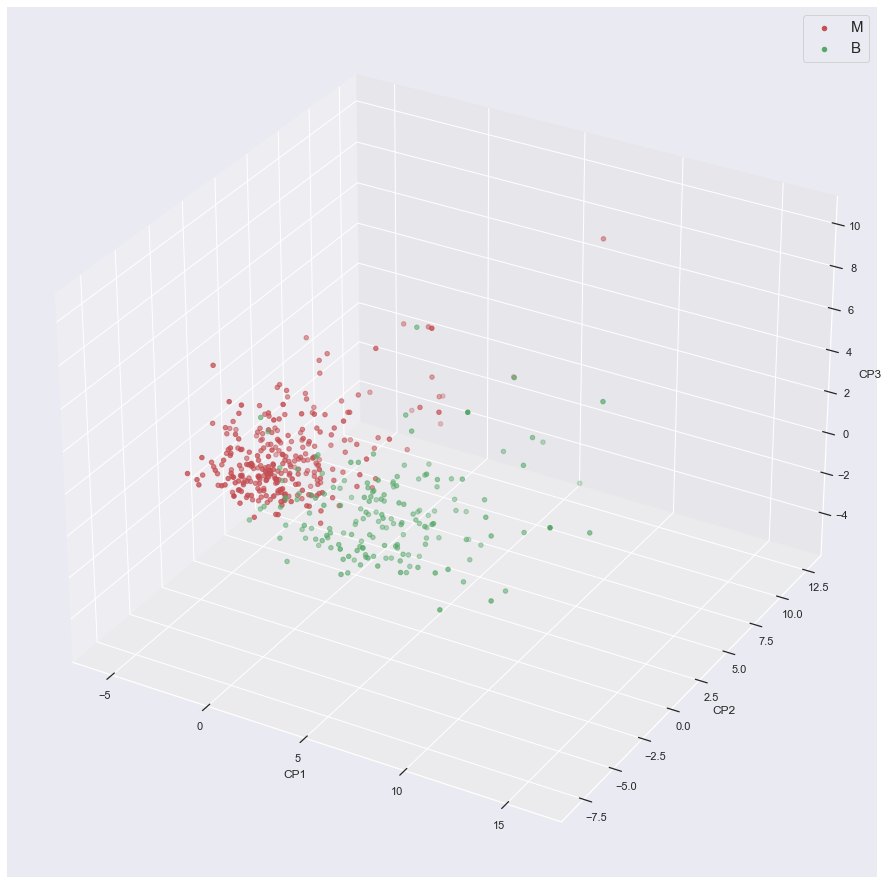

In [27]:
#visão 3D, botando na análise a 3ª componente também
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style="darkgrid")

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(111, projection = "3d")

x=principalDF[0]
y=principalDF[1]
z=principalDF[2]

ax.set_xlabel("CP1")
ax.set_ylabel("CP2")
ax.set_zlabel("CP3")

#ax.scatter(x,y,z)

colors = ["r","g"]

for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    ax.scatter((principalDF.loc[indicesToKeep,0]),
              (principalDF.loc[indicesToKeep,1]),
               (principalDF.loc[indicesToKeep,2]), c = color)
ax.legend(labels, prop={"size":15})
plt.show()

In [28]:
#Agora partindo pra mesma análise anterior, porém com a redução de dimensionalidade

forest_clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)

y_probas_forest = cross_val_predict(forest_clf_pca, principalDF, y_train,
                                    cv=3, method="predict_proba", n_jobs=-1)
y_scores_forest = y_probas_forest[:,1] #score = prob. de ser da classe positiva

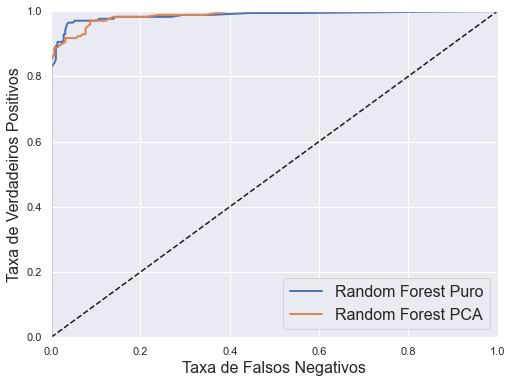

Random Forest: 0.9870174204493731
Random Forest PCA: 0.9876691355981297


In [29]:
# Com isso, é possível ter uma acurácia de 0,06% a mais. Apesar de ter aperfiçoado pouco, é possível ter com o PCA
# mais poder de processamento, velocidade de compilação. Transformamos de 31 para 10 componentes, mas e
# se fosse 100 variáveis? a mudança seria muito mais significativa.

fpr_forest_pca, tpr_forest_pca, thresholds_forest_pca = roc_curve(y_train, y_scores_forest)

sns.set(font_scale = 1)
plt.figure(figsize=(8,6))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest Puro")
plt.plot(fpr_forest_pca, tpr_forest_pca, linewidth=2, label="Random Forest PCA")

plt.plot([0,1], [0,1], "k--")
plt.axis([0,1,0,1])
plt.xlabel("Taxa de Falsos Negativos", fontsize=16)
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()
print("Random Forest: "+str(auc(fpr_forest, tpr_forest)))
print("Random Forest PCA: "+str(auc(fpr_forest_pca, tpr_forest_pca)))
